In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the dataset

In [99]:
import pandas as pd

Create DataFrame as df ( Created by Pandas )

In [100]:
## Load the datasets
df_train = pd.read_csv('/content/drive/MyDrive/NLP/emotions_dataset/train.txt', sep=';', header=None)
df_valid = pd.read_csv('/content/drive/MyDrive/NLP/emotions_dataset/val.txt', sep=';', header=None)
df_test = pd.read_csv('/content/drive/MyDrive/NLP/emotions_dataset/test.txt', sep=';', header=None)

df_train.columns = ['text', 'emotion']
df_valid.columns = ['text', 'emotion']
df_test.columns = ['text', 'emotion']

## Combine all dataset in one DF
df = pd.concat((df_train, df_valid, df_test), axis=0)

dataset = df[['emotion', 'text']]
dataset

,emotion,text
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy
...,...,...
1995,anger,i just keep feeling like someone is being unki...
1996,anger,im feeling a little cranky negative after this...
1997,joy,i feel that i am useful to my people and that ...
1998,joy,im feeling more comfortable with derby i feel ...


# Import Libraries

# Pre - Processing

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
print('The Shape of the Dataset is: ', df.shape)

The Shape of the Dataset is:  (20000, 2)


In [103]:
## Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     20000 non-null  object
 1   emotion  20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


##### look for null falues

In [104]:
df.isna().sum()

text       0
emotion    0
dtype: int64

##### Look for duplicate values

In [105]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 20000, dtype: bool

In [106]:
## Check the emotions values
df['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [107]:
## Distribution of emotions
df['emotion'].value_counts()  ## imblanced dataset

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: emotion, dtype: int64

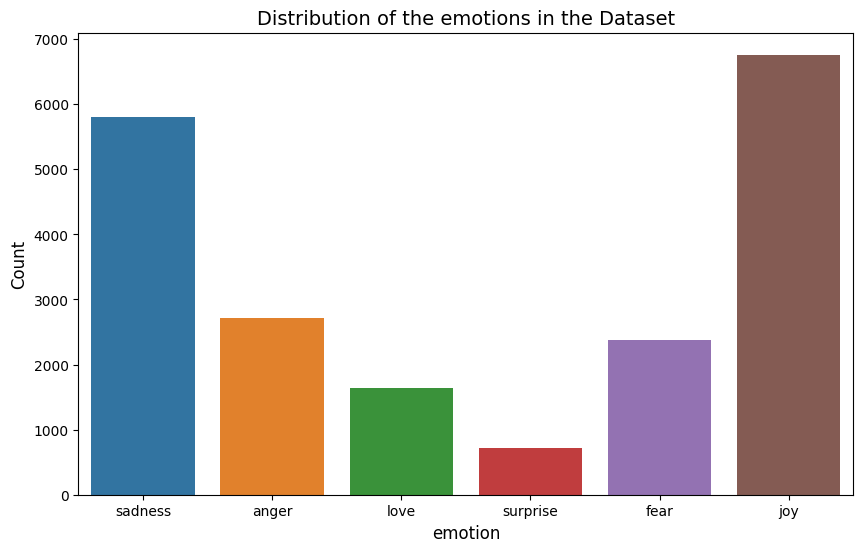

In [108]:
## countplot of emotion
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion')
plt.title('Distribution of the emotions in the Dataset', fontsize=14, c='k')
plt.xlabel('emotion', c='k', fontsize=12)
plt.ylabel('Count', c='k', fontsize=12)
plt.show()

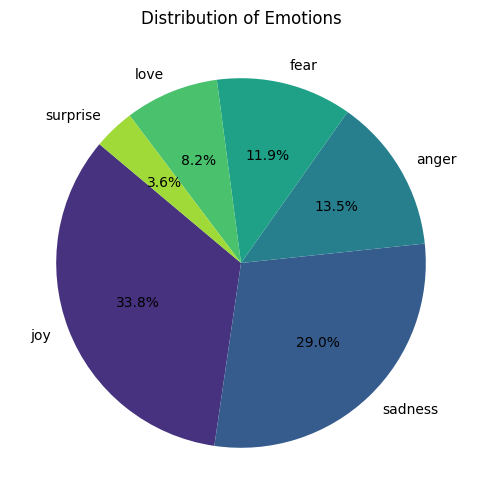

In [109]:
# A piechart for understanding the proportion
plt.figure(figsize=(6, 6))
plt.pie(df['emotion'].value_counts().values, labels=df['emotion'].value_counts().index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('viridis', len(df['emotion'].value_counts().index)))
plt.title('Distribution of Emotions')
plt.show()

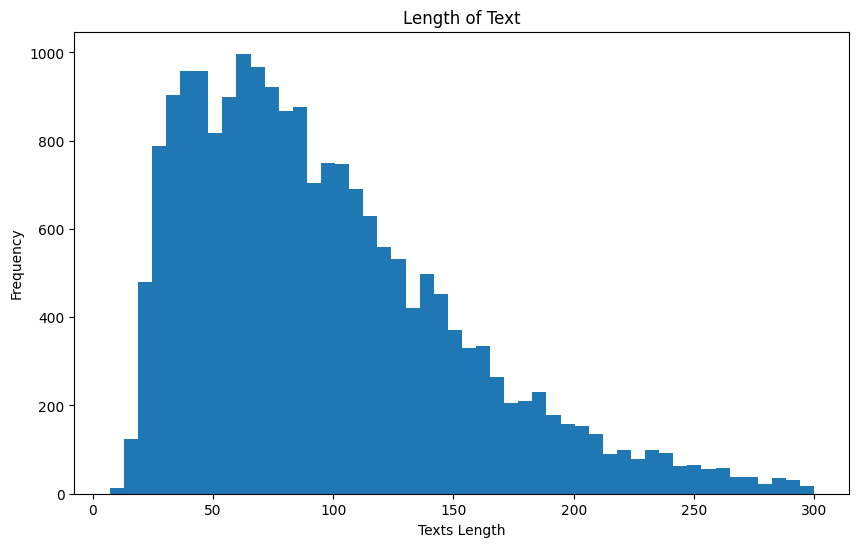

In [110]:
## Check Length
length_text = dataset['text'].str.len()
## Plotting
plt.figure(figsize=(10, 6))
plt.hist(length_text, bins=50)
plt.title('Length of Text')
plt.xlabel('Texts Length')
plt.ylabel('Frequency')
plt.show()

## Text cleaning

In [111]:
import re

In [112]:
import numpy as np
## Remove Unwanted text patterns from the texts
def remove_pattern(input_txt, pattern):
    ''' This Function takes the input and pattern you want to remove
    '''
    res = re.findall(pattern, input_txt)
    for i in res:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

## Removing @user in texts
dataset['text'] = np.vectorize(remove_pattern)(input_txt=dataset['text'], pattern='@[\w]*')
dataset.head()

,emotion,text
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [113]:
## Removing Punctuations, and Special Characters
dataset['text'] = dataset['text'].str.replace('[^a-zA-Z#]', ' ')
dataset.head()

<ipython-input-113-ff7afa0adf2c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['text'] = dataset['text'].str.replace('[^a-zA-Z#]', ' ')


,emotion,text
0,sadness,i didnt feel humiliated
1,sadness,i can go from feeling so hopeless to so damned...
2,anger,im grabbing a minute to post i feel greedy wrong
3,love,i am ever feeling nostalgic about the fireplac...
4,anger,i am feeling grouchy


In [114]:
## Removing Short Words
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
dataset.head()

,emotion,text
0,sadness,didnt feel humiliated
1,sadness,from feeling hopeless damned hopeful just from...
2,anger,grabbing minute post feel greedy wrong
3,love,ever feeling nostalgic about fireplace will kn...
4,anger,feeling grouchy


# Normalization

In [115]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [116]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk import PorterStemmer, WordNetLemmatizer

In [117]:
## Tokenization
tokenized_tweet = dataset['text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                            [didnt, feel, humiliated]
1    [from, feeling, hopeless, damned, hopeful, jus...
2        [grabbing, minute, post, feel, greedy, wrong]
3    [ever, feeling, nostalgic, about, fireplace, w...
4                                   [feeling, grouchy]
Name: text, dtype: object

In [118]:
## Stemming
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                                [didnt, feel, humili]
1    [from, feel, hopeless, damn, hope, just, from,...
2             [grab, minut, post, feel, greedi, wrong]
3    [ever, feel, nostalg, about, fireplac, will, k...
4                                      [feel, grouchi]
Name: text, dtype: object

In [119]:
## Lemmatization
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head()

0                                [didnt, feel, humili]
1    [from, feel, hopeless, damn, hope, just, from,...
2             [grab, minut, post, feel, greedi, wrong]
3    [ever, feel, nostalg, about, fireplac, will, k...
4                                      [feel, grouchi]
Name: text, dtype: object

In [120]:
tokenized_tweet

0                                   [didnt, feel, humili]
1       [from, feel, hopeless, damn, hope, just, from,...
2                [grab, minut, post, feel, greedi, wrong]
3       [ever, feel, nostalg, about, fireplac, will, k...
4                                         [feel, grouchi]
                              ...                        
1995    [just, keep, feel, like, someon, be, unkind, d...
1996    [feel, littl, cranki, neg, after, thi, doctor,...
1997    [feel, that, use, peopl, that, give, great, fe...
1998    [feel, more, comfort, with, derbi, feel, thoug...
1999    [feel, weird, when, have, meet, peopl, text, l...
Name: text, Length: 20000, dtype: object

In [121]:
## Join tokens in each tweet to form sentences
dataset['text'] = [' '.join(tweet) for tweet in tokenized_tweet]

In [122]:
dataset.head()

,emotion,text
0,sadness,didnt feel humili
1,sadness,from feel hopeless damn hope just from be arou...
2,anger,grab minut post feel greedi wrong
3,love,ever feel nostalg about fireplac will know tha...
4,anger,feel grouchi


# Word Embedding

In [123]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### BOW

In [124]:
## Extracting Features from Cleaned texts using BOW
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X_bow = bow_vectorizer.fit_transform(dataset['text'])
X_bow = X_bow.toarray()
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TF - IDF

In [125]:
## Extracting Features from Cleaned texts using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(dataset['text'])
X_tfidf = X_tfidf.toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
## encoding the emotion
## Apply that to the dataset
lbl_enc = LabelEncoder().fit(dataset['emotion'])
dataset['emotion']= lbl_enc.transform(dataset['emotion'])
dataset['emotion'].head()

0    4
1    4
2    0
3    3
4    0
Name: emotion, dtype: int64

In [127]:
def before_models(method='BOW'):
    if method == 'bow' or method == 'BOW':
        X = X_bow
    elif method == 'tfidf' or method == 'TFIDF':
        X = X_tfidf
    else:
        print('Enter a method between (bow, tfidf)')

    y = dataset['emotion']

    ## Split Datsets to train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        shuffle=True, stratify=y,
                                                        test_size=0.2, random_state=15)

    print(f'Method: {method}')
    print('X_train shape:', X_train.shape)
    print('y_train shape:', y_train.shape)
    print('X_test shape:', X_test.shape)
    print('y_test shape:', y_test.shape)
    print('***'*20)

    return X_train, X_test, y_train, y_test

In [128]:
## Call my above function
X_train_bow, X_test_bow, y_train_bow, y_test_bow = before_models(method='BOW')
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = before_models(method='TFIDF')

Method: BOW
X_train shape: (16000, 1000)
y_train shape: (16000,)
X_test shape: (4000, 1000)
y_test shape: (4000,)
************************************************************
Method: TFIDF
X_train shape: (16000, 1000)
y_train shape: (16000,)
X_test shape: (4000, 1000)
y_test shape: (4000,)
************************************************************


# Modeling & Evaluation

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [130]:
## Model for BOW
model_bow = Sequential([
    Dense(256, activation='elu', input_shape=(X_train_bow.shape[1],)),
    Dense(128, activation='elu'),
    Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    Dense(6, activation='softmax')  # Using 'softmax' for multi-class classification with 3 classes
])

## Compile the model
model_bow.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the model
history_bow = model_bow.fit(X_train_bow, y_train_bow, epochs=20, batch_size=32, validation_data=(X_test_bow, y_test_bow), verbose=1)

Epoch 1/20
500/500 [==============================] - 8s 12ms/step - loss: 0.6951 - accuracy: 0.7563 - val_loss: 0.5114 - val_accuracy: 0.8273
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.4018 - accuracy: 0.8555 - val_loss: 0.4873 - val_accuracy: 0.8260
Epoch 3/20
500/500 [==============================] - 5s 11ms/step - loss: 0.3528 - accuracy: 0.8651 - val_loss: 0.4985 - val_accuracy: 0.8215
Epoch 4/20
500/500 [==============================] - 4s 7ms/step - loss: 0.3182 - accuracy: 0.8742 - val_loss: 0.4993 - val_accuracy: 0.8263
Epoch 5/20
500/500 [==============================] - 5s 9ms/step - loss: 0.2888 - accuracy: 0.8859 - val_loss: 0.5203 - val_accuracy: 0.8177
Epoch 6/20
500/500 [==============================] - 3s 7ms/step - loss: 0.2630 - accuracy: 0.8961 - val_loss: 0.5580 - val_accuracy: 0.8213
Epoch 7/20
500/500 [==============================] - 3s 6ms/step - loss: 0.2350 - accuracy: 0.9093 - val_loss: 0.6071 - val_accuracy: 0.8177
Epo

In [131]:
## Evaluate the model on test set
test_loss_bow, accuracy_test_bow = model_bow.evaluate(X_test_bow, y_test_bow, verbose=0)
print(f'Test Accuracy using BOW method on test dataset: {accuracy_test_bow * 100:.2f}%')

## Make predictions on validation set
y_pred_bow = model_bow.predict(X_test_bow)
y_pred_bow = y_pred_bow.argmax(axis=-1)

## Calculate accuracy on validation set
accuracy_test_bow = accuracy_score(y_test_bow, y_pred_bow)
print(f'Test Accuracy using BOW on test dataset: {accuracy_test_bow * 100:.2f}%')

Test Accuracy using BOW method on test dataset: 80.95%
125/125 [==============================] - 0s 2ms/step
Test Accuracy using BOW on test dataset: 80.95%


In [132]:
from sklearn.metrics import classification_report
## Report for BOW
print(classification_report(y_test_bow, y_pred_bow))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       542
           1       0.73      0.76      0.75       475
           2       0.85      0.86      0.85      1352
           3       0.68      0.61      0.65       328
           4       0.87      0.87      0.87      1159
           5       0.57      0.63      0.60       144

    accuracy                           0.81      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.81      0.81      0.81      4000



### Model for TF - IDF

In [133]:
## Model for TF-IDF
model_tfidf = Sequential([
    Dense(256, activation='elu', input_shape=(X_train_tfidf.shape[1],)),
    Dense(128, activation='elu'),
    Dense(64, activation='elu'),
    Dense(32, activation='elu'),
    Dense(6, activation='softmax')  # Using 'softmax' for multi-class classification with 3 classes
])

## Compile the model
model_tfidf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the model
history_tfidf = model_tfidf.fit(X_train_tfidf, y_train_tfidf, epochs=20, batch_size=32, validation_data=(X_test_tfidf, y_test_tfidf), verbose=1)

Epoch 1/20
500/500 [==============================] - 6s 10ms/step - loss: 0.6834 - accuracy: 0.7541 - val_loss: 0.4872 - val_accuracy: 0.8207
Epoch 2/20
500/500 [==============================] - 3s 6ms/step - loss: 0.4078 - accuracy: 0.8537 - val_loss: 0.4775 - val_accuracy: 0.8273
Epoch 3/20
500/500 [==============================] - 3s 6ms/step - loss: 0.3628 - accuracy: 0.8658 - val_loss: 0.4978 - val_accuracy: 0.8242
Epoch 4/20
500/500 [==============================] - 3s 6ms/step - loss: 0.3374 - accuracy: 0.8748 - val_loss: 0.5129 - val_accuracy: 0.8273
Epoch 5/20
500/500 [==============================] - 3s 7ms/step - loss: 0.3212 - accuracy: 0.8769 - val_loss: 0.5154 - val_accuracy: 0.8210
Epoch 6/20
500/500 [==============================] - 5s 10ms/step - loss: 0.3025 - accuracy: 0.8836 - val_loss: 0.5211 - val_accuracy: 0.8195
Epoch 7/20
500/500 [==============================] - 4s 8ms/step - loss: 0.2797 - accuracy: 0.8896 - val_loss: 0.5537 - val_accuracy: 0.8195
Epoc

In [134]:
## Evaluate the model on test set
test_loss_tfidf, accuracy_test_tfidf = model_tfidf.evaluate(X_test_tfidf, y_test_tfidf, verbose=0)
print(f'Test Accuracy using TF-IDF method on test dataset: {accuracy_test_tfidf * 100:.2f}%')

## Make predictions on test set
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
y_pred_tfidf = y_pred_tfidf.argmax(axis=-1)

## Calculate accuracy on test set
accuracy_test_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print(f'Test Accuracy using TF-IDF on test dataset: {accuracy_test_tfidf * 100:.2f}%')

Test Accuracy using TF-IDF method on test dataset: 79.58%
125/125 [==============================] - 0s 3ms/step
Test Accuracy using TF-IDF on test dataset: 79.57%


In [135]:
## Report for TFIDF
from sklearn.metrics import classification_report
print(classification_report(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       542
           1       0.78      0.72      0.75       475
           2       0.86      0.81      0.83      1352
           3       0.63      0.65      0.64       328
           4       0.85      0.87      0.86      1159
           5       0.56      0.65      0.60       144

    accuracy                           0.80      4000
   macro avg       0.73      0.75      0.74      4000
weighted avg       0.80      0.80      0.80      4000



In [136]:
## model using BOW
model_bow.save('bow_model.h5')

## model using tfidf
model_tfidf.save('tfidf_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [137]:
## inferenc on new samples
## Lets test on exmaples that already done for it (cleaning, stemming, lemmatization) and so on as our model has been trained
## if not, you should prepocess the model first with the same steps and preprocessing

new_samples = ['feel weird when have meet peopl text like dont talk face face',
              'feel that use peopl that give great feel achiev']

new_vects = tfidf_vectorizer.transform(new_samples).toarray()

new_samples_classes = np.argmax(model_tfidf.predict(new_vects), axis=-1)
new_samples_classes = lbl_enc.inverse_transform(new_samples_classes)

new_samples_classes

1/1 [==============================] - 0s 102ms/step


array(['fear', 'joy'], dtype=object)